In [1]:
#!pip install pandas
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df_orig = pd.read_csv("ny_poi/pois_all_info.csv", sep="\t", low_memory=False, index_col=None)
df_filter = pd.read_csv("ny_poi/ny_municipality_pois_id.csv", header=None)
df_filter.columns = ["@id"]
df_orig

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
4,42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...,...
77879,600919896,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77880,600919898,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77881,600919900,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77882,600931232,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter the original dataframe

In [3]:
df = df_orig.loc[ df_orig["@id"].isin(df_filter["@id"].to_numpy()) ]
print("Difference between dataframes: ", df_orig.shape[0] - df.shape[0])
print(df.shape)

Difference between dataframes:  24363
(53521, 9)


## Count NaN values

In [4]:
df.isnull().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28824
name                22972
shop                44804
public_transport    45146
highway             45962
dtype: int64

# Filter unfrequent categories

In [13]:
columns = ["amenity", "shop", "public_transport", "highway"]
type_limit = 15

df_filtered = df

for col in columns:
    print("="*25,f" {col:^15}", "="*25)
    if df[col].unique().size < type_limit:
        continue
    percentages = df_filtered[col].dropna().value_counts() / df_filtered[col].dropna().shape[0] * 100
    bad_percentages = []
    
    for p in percentages.items():
        if p[1] < 1:
            bad_percentages.append(p[0])
        else:
            print(p)
    
    df_filtered = df_filtered[ ~df[col].isin(bad_percentages) ]

=========================      amenity     =========================
('bicycle_parking', 24.505000607361218)
('restaurant', 16.827954812325384)
('fast_food', 6.1991334979957085)
('cafe', 5.563428756529134)
('post_box', 4.425638741547557)
('bench', 4.308215572741628)
('place_of_worship', 4.097663683848241)
('school', 3.69275620520711)
('drinking_water', 3.4903024658865447)
('bar', 3.3242903996436812)
('bank', 2.6602421346722274)
('pharmacy', 2.194598534234927)
('bicycle_rental', 1.8261327286714986)
('toilets', 1.0244159209620602)
=========================       shop       =========================
('convenience', 9.664785162999655)
('clothes', 9.342241677226127)
('supermarket', 6.393272664439581)
('hairdresser', 5.586913950005759)
('deli', 5.321967515263219)
('beauty', 4.849671696809123)
('alcohol', 4.699919364128557)
('laundry', 4.3773758783550285)
('bakery', 3.709250086395577)
('mobile_phone', 2.810736090312176)
('dry_cleaning', 2.6149061168068197)
('car_repair', 1.7624697615482088)
(

C:\Users\User\AppData\Local\Temp\ipykernel_21592\3813345005.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[ ~df[col].isin(bad_percentages) ]


<AxesSubplot: >

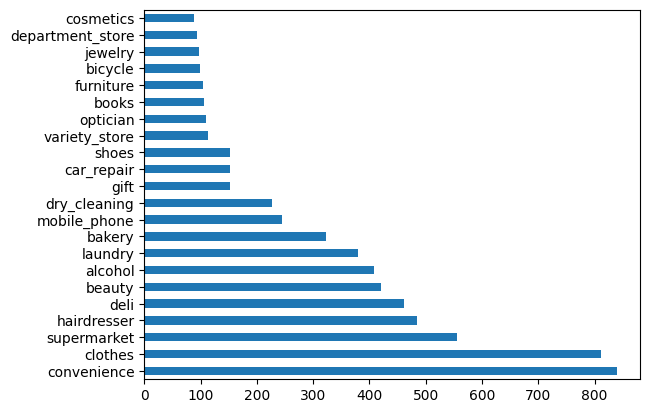

In [16]:
# choose between ["amenity", "shop", "public_transport", "highway"]
df_filtered["shop"].dropna().value_counts().plot.barh()